In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [98]:
from google.colab import files
uploaded=files.upload()

Saving adult-test.csv to adult-test (1).csv


In [105]:
dataset=pd.read_csv('adult-test.csv')

In [106]:
dataset.replace(np.nan, 0,inplace=True)
#dataset.head(2)


In [107]:
dataset.dtypes

Age               int64
fnlgwt            int64
Education Num     int64
Capital Gain      int64
Capital Loss      int64
Hours             int64
income           object
dtype: object

In [102]:
dataset.dropna(inplace=True)

In [108]:
#dataset['income']=dataset['income'].map({'<=50K': 0,'>50K': 1}).astype('float')
dataset["income_score"]=[1 if ">50K." in salary else 0 for salary in dataset['income']]


In [109]:
dataset.head(50)

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours,income,income_score
0,25,226802,7,0,0,40,<=50K.,0
1,38,89814,9,0,0,50,<=50K.,0
2,28,336951,12,0,0,40,>50K.,1
3,44,160323,10,7688,0,40,>50K.,1
4,18,103497,10,0,0,30,<=50K.,0
5,34,198693,6,0,0,30,<=50K.,0
6,29,227026,9,0,0,40,<=50K.,0
7,63,104626,15,3103,0,32,>50K.,1
8,24,369667,10,0,0,40,<=50K.,0
9,55,104996,4,0,0,10,<=50K.,0


In [110]:
dataset.columns

Index(['Age', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss',
       'Hours ', 'income', 'income_score'],
      dtype='object')

In [111]:
dataset=dataset[['Age', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss',
       'Hours ', 'income_score']]

### i assign a value if the salary is less then 50k i assign 0 and if the salary is greater i assign 1

In [112]:
dataset.head(2)

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours,income_score
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0


In [113]:
X=dataset.iloc[:,:-1].values


In [114]:
Y=dataset.iloc[:,-1].values

In [ ]:
X

array([[    25, 226802,      7,      0,      0,     40],
       [    38,  89814,      9,      0,      0,     50],
       [    28, 336951,     12,      0,      0,     40],
       ...,
       [    38, 374983,     13,      0,      0,     50],
       [    44,  83891,     13,   5455,      0,     40],
       [    35, 182148,     13,      0,      0,     60]])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [119]:
error=[]
for i in range(1,40) :
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!=y_test))

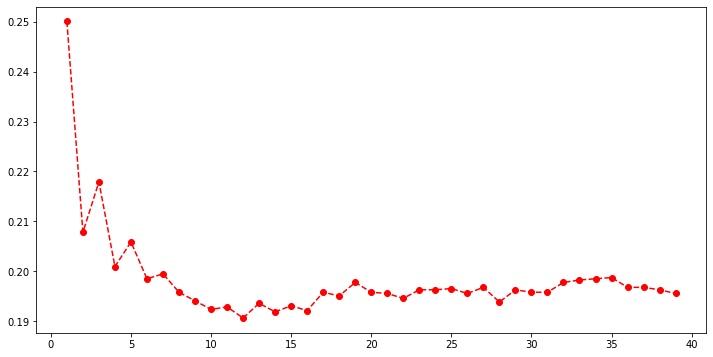

In [120]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o')


In [123]:
model=KNeighborsClassifier(n_neighbors=12,metric='Enc')
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=12)

In [127]:
Age=int(input('ENTER THE NEW AGE OF THE EMPLOYEE'))
Fnlgwt=int(input('ENTER THE FNLGWT OF THE EMPLOYEE'))
Education_Num=int(input('ENTER THE EDUCATION NUMBER OF THE EMPLOYEE'))
Capital_Gain=int(input('ENTER THE CAPITAL GAIN OF THE EMPLOYEE'))
Capital_Loss=int(input('ENTER THE CAPITAL LOSS OF THE EMPLOYEE'))
Hours=int(input('ENTER THE WORKING HOURS OF THE EMPLOYEE'))
salary=[[Age,Fnlgwt,Education_Num,Capital_Gain,Capital_Loss,Hours]]
result=model.predict(sc.transform(salary))
if result==1 :
  print('Employee might got salary above 50k')
else :
  print('Employee might got salary below 50K')

ENTER THE NEW AGE OF THE EMPLOYEE20
ENTER THE FNLGWT OF THE EMPLOYEE12
ENTER THE EDUCATION NUMBER OF THE EMPLOYEE230
ENTER THE CAPITAL GAIN OF THE EMPLOYEE23
ENTER THE CAPITAL LOSS OF THE EMPLOYEE23
ENTER THE WORKING HOURS OF THE EMPLOYEE43
Employee might got salary below 50K


In [131]:
y_pred=model.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix: ')
print(cm)
print('Accuracy of the model : {0}% '.format(accuracy_score(y_test,y_pred)*100))

confusion matrix: 
[[2906  140]
 [ 636  389]]
Accuracy of the model : 80.93834438712847% 
